Iterasi 1 - Bobot Model: 1.0000
Iterasi 2 - Bobot Model: 1.0000
Iterasi 3 - Bobot Model: 1.0000
Iterasi 4 - Bobot Model: 1.0000
Iterasi 5 - Bobot Model: 1.0000
Akurasi Model: 1.0000


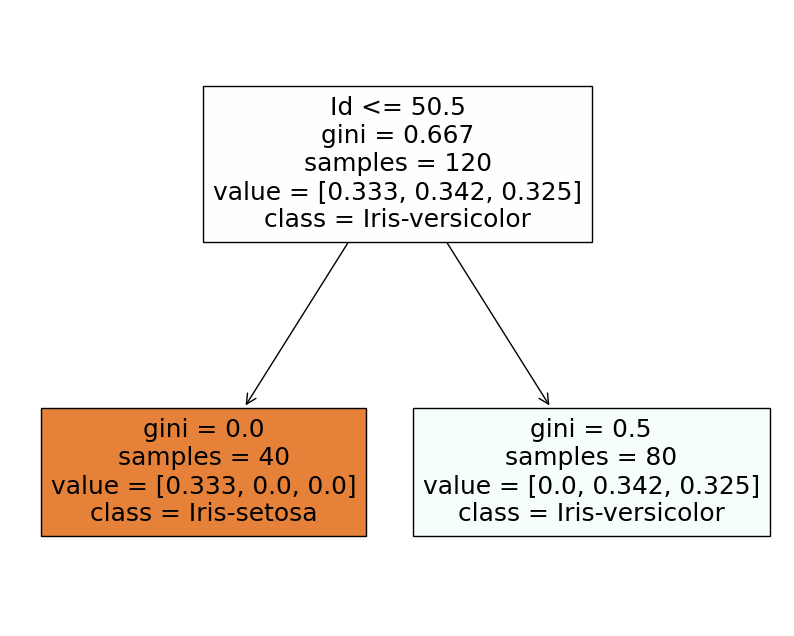

In [5]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Membaca dataset iris dari file CSV
iris_data = pd.read_csv('iris.csv')

# Memisahkan fitur dan target
X = iris_data.drop('Species', axis=1)
y = iris_data['Species']

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menggunakan Decision Tree sebagai model lemah
base_model = DecisionTreeClassifier(max_depth=1)

# Menginisialisasi model boosting dengan 5 iterasi
boosting_model = AdaBoostClassifier(base_model, n_estimators=5, random_state=42)

# Melatih model pada data latih
boosting_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = boosting_model.predict(X_test)

# Menampilkan bobot model pada setiap iterasi
for i, model in enumerate(boosting_model.estimators_):
    print(f"Iterasi {i+1} - Bobot Model: {boosting_model.estimator_weights_[i]:.4f}")

# Menghitung akurasi model pada data uji
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.4f}")

# Visualisasi Decision Tree pada iterasi pertama
plt.figure(figsize=(10, 8))
plot_tree(boosting_model.estimators_[0], feature_names=X.columns, class_names=iris_data['Species'].unique(), filled=True)
plt.show()


Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm   
0      1            5.1           3.5            1.4           0.2  \
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]